<a href="https://colab.research.google.com/github/Mghane/My-Py-Docs/blob/master/Part_1_Introduction_to_Neural_Networks_with_TensorFlow_(Exercise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks with TensorFlow

In this notebook, you'll get introduced to [TensorFlow](https://www.tensorflow.org/), an open source library to help you develop and train machine learning models.

TensorFlow in a lot of ways behaves like the arrays you love from NumPy. NumPy arrays, after all, are just tensors. TensorFlow takes these tensors and makes it simple to move them to GPUs for the faster processing needed when training neural networks. TensorFlow can also calculate gradients automatically, which is perfect for backpropagation, and has  intuitive high-level APIs specifically for building neural networks. 

## Neural Networks

Deep Learning is based on artificial neural networks which have been around in some form since the late 1950s. The networks are built from individual parts approximating neurons, typically called units or simply "neurons." Each unit has some number of weighted inputs. These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit's output.

<img src="assets/simple_neuron.png" width=400px>

Mathematically, the above looks like: 

$$
y = f(h)
$$

where,

$$
h = w_1 x_1 + w_2 x_2 + b = \sum_{i=1}^2 w_i x_i + b
$$

If we let $b = w_0x_0$, then we can express $h$ as the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_0 \, x_1 \, x_2
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_0 \\
           w_1 \\
           w_2
\end{bmatrix} = w_0 x_0 + w_1 x_1 + w_2 x_2
$$

## Tensors

It turns out neural network computations are just a bunch of linear algebra operations on *tensors*, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and TensorFlow is built around tensors.

<img src="assets/tensor_examples.svg" width=600px>

With the basics covered, it's time to explore how we can use TensorFlow to build a simple neural network.

## Import Resources

In [0]:
pip install -q -U "tensorflow-gpu==2.0.0b1"

Note: you may need to restart the kernel to use updated packages.


In [0]:
pip install protobuf

Note: you may need to restart the kernel to use updated packages.


In [0]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)

Using:
	• TensorFlow version: 2.2.0


## Single Layer Neural Network

In [13]:
# Set the random seed so things are reproducible
tf.random.set_seed(7) 

# Create 5 random input features
features = tf.random.normal((1, 5))

# Create random weights for our neural network
weights = tf.random.normal((1, 5))

# Create a random bias term for our neural network
bias = tf.random.normal((1, 1))

print('Features:\n', features)
print('\nWeights:\n', weights)
print('\nBias:\n', bias)

Features:
 tf.Tensor([[ 0.5983449   0.06276207  0.14631742  0.48481876 -0.23572342]], shape=(1, 5), dtype=float32)

Weights:
 tf.Tensor([[-2.2733312  -1.6592104  -0.2633568  -0.80923414  1.0294315 ]], shape=(1, 5), dtype=float32)

Bias:
 tf.Tensor([[1.5749502]], shape=(1, 1), dtype=float32)


Above we generated data we can use to get the output of our simple network. This is all just random for now, going forward we'll start using real data. 

As we can see above, in TensorFlow, tensors are `tf.Tensor` objects that have a data type and a shape. Now let's go through each relevant line:

* `features = tf.random.normal((1, 5))` creates a tensor with shape `(1, 5)`, one row and five columns, that contains random values from a normal distribution with a mean of zero and standard deviation of one.

* `weights = tf.random.normal((1, 5))` creates a tensor with shape `(1, 5)`, one row and five columns, again containing random values from a normal distribution with a mean of zero and standard deviation of one.

* `bias = tf.random.normal((1, 1))` creates a single random value from a normal distribution.

TensorFlow's tensors can be added, multiplied, subtracted, etc., just like NumPy arrays. In general, you'll use TensorFlow's tensors pretty much the same way you'd use NumPy arrays. They come with some nice benefits though such as GPU acceleration which we'll get to later. For now, we will use the generated random data to calculate the output of this simple single layer network.

Now we create the activation function we are going to use:

In [0]:
def sigmoid_activation(x):
    """ Sigmoid activation function
    
        Arguments
        ---------
        x: tf.Tensor. Must be one of the following types: bfloat16, half, float32, float64, complex64, complex128.
    """
    return 1/(1+tf.exp(-x))

Now, let's calculate the output of our single layer neural network.

> **Exercise**: Calculate the output of the network with input features `features`, weights `weights`, and bias `bias`. Similar to NumPy, TensorFlow has a `tf.multiply(a, b)` that multiplies tensors `a` and `b` element-wise. It also has `tf.reduce_sum(x)` that computes the sum of the elements of tensor `x`. Use the `sigmoid_activation` function defined above as the activation function.

In [18]:
## Solution
y = sigmoid_activation(tf.reduce_sum(tf.multiply(features, weights))+ bias)

print('label:\n', y)

label:
 tf.Tensor([[0.3628656]], shape=(1, 1), dtype=float32)


You can do the multiplication and sum in the same operation using a matrix multiplication. In general, you'll want to use matrix multiplications since they are more efficient and accelerated using modern libraries and high-performance computing on GPUs.

Here, we want to do a matrix multiplication of the features and the weights. For this we can use `tf.matmul()`. If we try to do it with `features` and `weights` as they are, we'll get an error

```python
>> tf.matmul(features, weights)

---------------------------------------------------------------------------
InvalidArgumentError                      Traceback (most recent call last)
<ipython-input-7-66a4fe44f20b> in <module>()
      1 
----> 2 y = sigmoid_activation(tf.matmul(features, weights) + bias)

2 frames
/usr/local/lib/python3.6/dist-packages/six.py in raise_from(value, from_value)

InvalidArgumentError: Matrix size-incompatible: In[0]: [1,5], In[1]: [1,5] [Op:MatMul] name: MatMul/
```

As you're building neural networks in any framework, you'll see this often. Really often. What's happening here is our tensors aren't the correct shapes to perform a matrix multiplication. Remember that for matrix multiplications, the number of columns in the first tensor must equal to the number of rows in the second tensor. Both `features` and `weights` have the same shape, `(1, 5)`. This means we need to change the shape of `weights` to get the matrix multiplication to work.

**Note:** To see the shape of a tensor called `tensor`, use `tensor.shape`. If you're building neural networks, you'll be using this method often.

In [0]:
print('Features Shape:', features.shape)
print('Weights Shape:', weights.shape)
print('Bias Shape:', bias.shape)

Now, we need to change the shape of the `weights` tensor to get the matrix multiplication to work. However, if we use the `tf.matmul(a,b)` function, this will not be necessary because the `tf.matmul(a,b)` function has the `transpose_a` and `transpose_b` arguments that allows us to transpose the `a` or `b` tensors for the multiplication without actually changing the shape of the tensor permanently. Therefore, in this case we can use the argument `transpose_b = True` to transpose the `weights` tensor from `(1,5)` to `(5,1)` just for the multiplication.

> **Exercise**: Calculate the output of our little network using matrix multiplication.

In [20]:
## Solution
y = sigmoid_activation(tf.matmul(features, weights,transpose_b=(5,1))+bias)
#alternative# y = sigmoid_activation(tf.matmul(features, weights,transpose_b=True)+bias)
print('label:\n', y)

label:
 tf.Tensor([[0.3628656]], shape=(1, 1), dtype=float32)


We can see that we get the same value as before. Now let's check that the shape of the `weights` tensor has not been permanently changed by the `transpose_b = True` argument. 

In [21]:
print('Weights Shape:', weights.shape)

Weights Shape: (1, 5)


As we can see, the shape of the `weights` tensor remains unchanged.

## Multi-Layer Neural Network

That's how you can calculate the output for a single neuron. The real power of this algorithm happens when you start stacking these individual units into layers and stacks of layers, into a network of neurons. The output of one layer of neurons becomes the input for the next layer. With multiple input units and output units, we now need to express the weights as a matrix.

<img src='assets/multilayer_diagram_weights.png' width=450px>

In the diagram above, the first layer shown on the bottom are the inputs, understandably called the **input layer**. The middle layer is called the **hidden layer**, and the final layer (on the top) is the **output layer**. We can express this network mathematically with matrices and use matrix multiplication to get linear combinations for each unit in one operation. For example, the hidden layer (comprised of units $h_1$ and $h_2$) can be calculated as follows:

$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

The output for this small network is found by treating the hidden layer as inputs for the output unit. The network output is expressed simply as:

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

In [0]:
# Set the random seed so things are reproducible
tf.random.set_seed(7) 

# Create 3 random input features
features = tf.random.normal((1,3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Create random weights connecting the inputs to the hidden layer
W1 = tf.random.normal((n_input,n_hidden))

# Create random weights connecting the hidden layer to the output layer
W2 = tf.random.normal((n_hidden, n_output))

# Create random bias terms for the hidden and output layers
B1 = tf.random.normal((1,n_hidden))
B2 = tf.random.normal((1, n_output))

> **Exercise:** Calculate the output for this multi-layer network using the weights `W1` & `W2`, and the biases, `B1` & `B2`. 

In [28]:
## Solution
h = sigmoid_activation(tf.matmul(features, W1) + B1)
output =sigmoid_activation(tf.matmul(h, W2)+B2)

print(output)

tf.Tensor([[0.10678572]], shape=(1, 1), dtype=float32)


If you did this correctly, you should see the output: `tf.Tensor([[0.10678572]], shape=(1, 1), dtype=float32)`

The number of hidden units is a parameter of the network, often called a **hyperparameter** to differentiate it from the weights and biases parameters. **As you'll see later when we discuss training a neural network, the more hidden layers and units a network has, the better able it will be able to learn from data and make accurate predictions.**

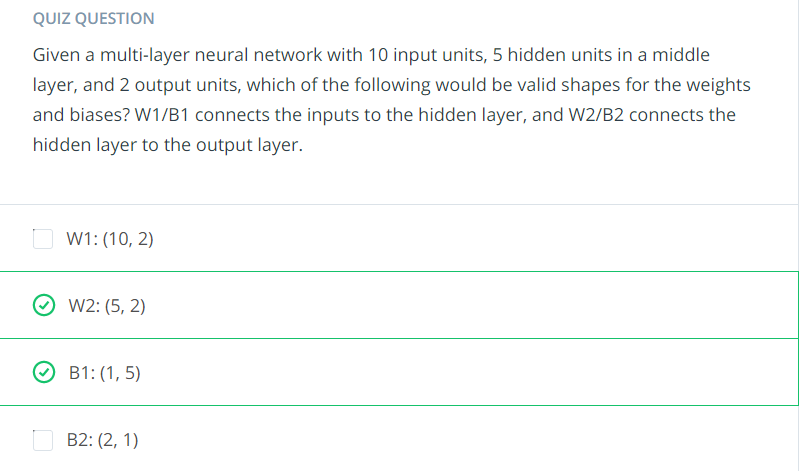

## NumPy to TensorFlow and Back

This is a special bonus section! TensorFlow has a great feature for converting between NumPy's `ndarrays` and its `tf.Tensors`. To create a tensor from a NumPy ndarray, use `tf.convert_to_tensor()`. To convert a tensor to a NumPy array, use the `.numpy()` method. Below are some examples:

In [29]:
# Set the random seed so things are reproducible
tf.random.set_seed(7) 

a = np.random.rand(4,3)

print(type(a))
print(a)

<class 'numpy.ndarray'>
[[0.45027788 0.44620802 0.10120831]
 [0.25790808 0.49933945 0.86914011]
 [0.15227735 0.46334821 0.90554347]
 [0.53483529 0.69718562 0.37513458]]


In [30]:
b = tf.convert_to_tensor(a)

print(b)

tf.Tensor(
[[0.45027788 0.44620802 0.10120831]
 [0.25790808 0.49933945 0.86914011]
 [0.15227735 0.46334821 0.90554347]
 [0.53483529 0.69718562 0.37513458]], shape=(4, 3), dtype=float64)


In [31]:
c = b.numpy()

print(type(c))
print(c)

<class 'numpy.ndarray'>
[[0.45027788 0.44620802 0.10120831]
 [0.25790808 0.49933945 0.86914011]
 [0.15227735 0.46334821 0.90554347]
 [0.53483529 0.69718562 0.37513458]]


If you change the values of the Tensor, the values of the ndarray will not change, and vice-versa.

In [32]:
# Multiply TensorFlow Tensor by 40
b = b * 40

print(b)

tf.Tensor(
[[18.01111531 17.84832094  4.04833226]
 [10.31632313 19.97357816 34.76560425]
 [ 6.09109416 18.53392824 36.2217388 ]
 [21.39341169 27.88742479 15.0053834 ]], shape=(4, 3), dtype=float64)


In [33]:
# NumPy array stays the same
a

array([[0.45027788, 0.44620802, 0.10120831],
       [0.25790808, 0.49933945, 0.86914011],
       [0.15227735, 0.46334821, 0.90554347],
       [0.53483529, 0.69718562, 0.37513458]])

In [34]:
# NumPy array stays the same
c

array([[0.45027788, 0.44620802, 0.10120831],
       [0.25790808, 0.49933945, 0.86914011],
       [0.15227735, 0.46334821, 0.90554347],
       [0.53483529, 0.69718562, 0.37513458]])

In [35]:
# Add 1 to NumPy ndarray
a = a + 1

print(a)

[[1.45027788 1.44620802 1.10120831]
 [1.25790808 1.49933945 1.86914011]
 [1.15227735 1.46334821 1.90554347]
 [1.53483529 1.69718562 1.37513458]]


In [36]:
# Tensor stays the same
print(b)

tf.Tensor(
[[18.01111531 17.84832094  4.04833226]
 [10.31632313 19.97357816 34.76560425]
 [ 6.09109416 18.53392824 36.2217388 ]
 [21.39341169 27.88742479 15.0053834 ]], shape=(4, 3), dtype=float64)


In [37]:
# NumPy array stays the same
c

array([[0.45027788, 0.44620802, 0.10120831],
       [0.25790808, 0.49933945, 0.86914011],
       [0.15227735, 0.46334821, 0.90554347],
       [0.53483529, 0.69718562, 0.37513458]])